# TSNE visualization

In [19]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import pickle
import matplotlib.colors as mcolors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

dic = torch.load('result.pth', map_location='cpu')
with open('intent2id_multi_se_with_tokens.pkl', 'rb') as f:
    label_names = pickle.load(f)
label_names = list(label_names.keys())
# label_names.append('multiple labels')

## Get data

In [60]:
clusters = dic['clusters'] # (25, 768)
clusters_norm = clusters #/ np.sqrt(torch.sum(np.square(clusters), dim=-1, keepdims=True))
outputs = dic['outputs'] # (ns, 25)
labels = dic['labels'] # (ns, 25)

# handle labels
x, y = torch.where(labels==1)
from collections import defaultdict
label_dic = defaultdict(list)
for id_x, id_y in zip(x,y):
    label_dic[id_x.item()].append(id_y.item())

# get labels
onelabel = []
for k,v in label_dic.items():
    if len(v) > 1:
        onelabel.append(v[1])
    else:
        onelabel.append(v[0])

# total number of labels
num_label = clusters.shape[0]

In [5]:
# handle points
outputs = torch.sigmoid(outputs)
points = np.dot(outputs.numpy(), clusters_norm)
all_points = np.vstack([clusters_norm, points])

## TSNE

In [6]:
X = clusters_norm.numpy()
X_embedded = TSNE(n_components=2).fit_transform(all_points)
X_embedded.shape

(9067, 2)

## Visualization

In [202]:
for i,j in enumerate(colors):
    print(i, j)

0 black
1 dimgray
2 dimgrey
3 gray
4 grey
5 darkgray
6 darkgrey
7 silver
8 lightgray
9 lightgrey
10 gainsboro
11 whitesmoke
12 white
13 snow
14 rosybrown
15 lightcoral
16 indianred
17 brown
18 firebrick
19 maroon
20 darkred
21 red
22 mistyrose
23 salmon
24 tomato
25 darksalmon
26 coral
27 orangered
28 lightsalmon
29 sienna
30 seashell
31 chocolate
32 saddlebrown
33 sandybrown
34 peachpuff
35 peru
36 linen
37 bisque
38 darkorange
39 burlywood
40 antiquewhite
41 tan
42 navajowhite
43 blanchedalmond
44 papayawhip
45 moccasin
46 orange
47 wheat
48 oldlace
49 floralwhite
50 darkgoldenrod
51 goldenrod
52 cornsilk
53 gold
54 lemonchiffon
55 khaki
56 palegoldenrod
57 darkkhaki
58 ivory
59 beige
60 lightyellow
61 lightgoldenrodyellow
62 olive
63 yellow
64 olivedrab
65 yellowgreen
66 darkolivegreen
67 greenyellow
68 chartreuse
69 lawngreen
70 honeydew
71 darkseagreen
72 palegreen
73 lightgreen
74 forestgreen
75 limegreen
76 darkgreen
77 green
78 lime
79 seagreen
80 mediumseagreen
81 springgreen


In [229]:
colors = mcolors.CSS4_COLORS
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
colors = [name for hsv, name in by_hsv]
# indices = np.random.randint(0,len(colors),num_label)
# indices = np.round(np.linspace(0,len(colors)-1,num_label)).astype(np.int32)
indices[10] = 21
indices[6] = 67
indices[8] = 119
print(indices)
select_colors = np.array(list(colors))[indices]

color_dic = {i:color for i,color in enumerate(select_colors)}

df = pd.DataFrame({'x': X_embedded[num_label:,0], 'y': X_embedded[num_label:,1], 'labels':onelabel})
df['c'] = df.labels.map(color_dic)

[146 135  52  94  70 141  67  46 119  95  21 134 139  48 146 119  64  27
  57  80 101  99  20  10   4]


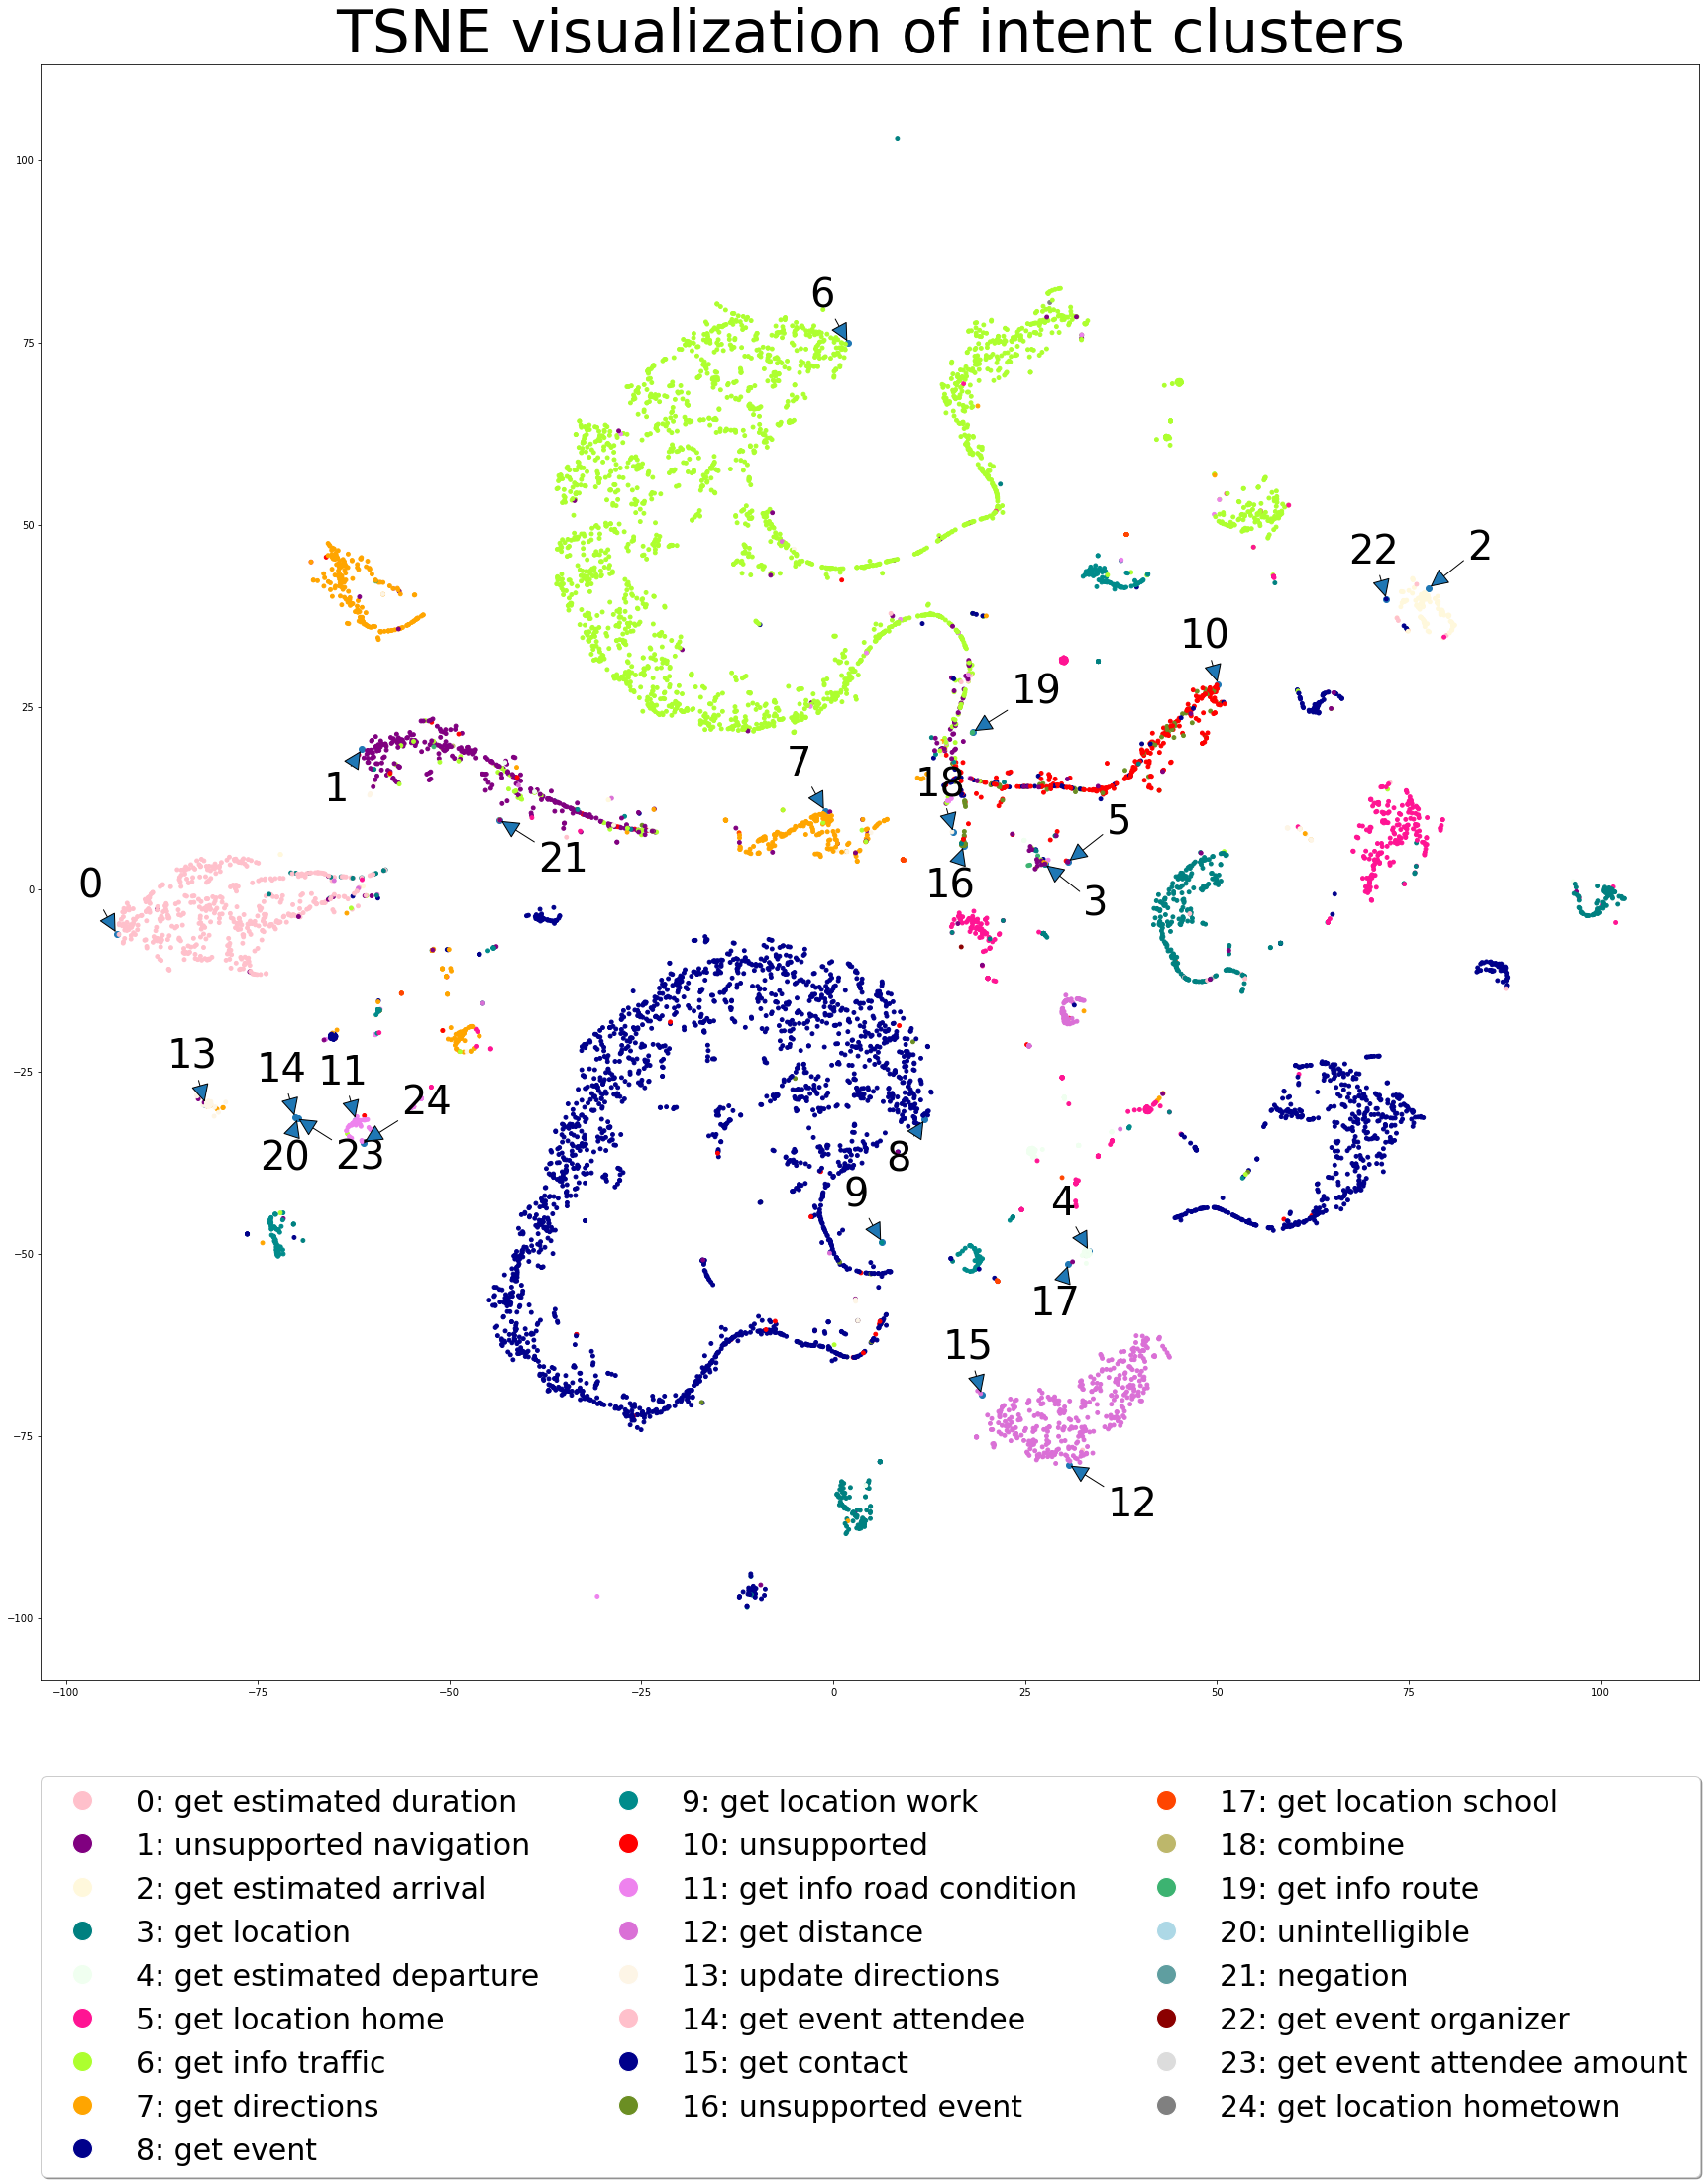

In [237]:
plt.figure(figsize = (30,30))
plt.scatter(X_embedded[:num_label,0], X_embedded[:num_label,1])
n = list(range(num_label))
for i, txt in enumerate(n):
    if i in [16, 20, 17, 1, 8]:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=40, xytext=(X_embedded[i,0]-5, X_embedded[i,1]-7),\
                arrowprops=dict(arrowstyle='-|>'))
    elif i in [23, 12, 3, 21]:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=40, xytext=(X_embedded[i,0]+5, X_embedded[i,1]-7),\
                arrowprops=dict(arrowstyle='-|>'))
    elif i in [19, 2, 5, 24]:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=40, xytext=(X_embedded[i,0]+5, X_embedded[i,1]+4),\
                arrowprops=dict(arrowstyle='-|>'))
    else:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=40, xytext=(X_embedded[i,0]-5, X_embedded[i,1]+5),\
                arrowprops=dict(arrowstyle='-|>'))

    
plt.scatter(df.x, df.y, c=df.c, alpha=1, s=15)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='{}: {}'.format(i,label_names[i]), 
               markerfacecolor=mcolor, markersize=20) for i, mcolor in enumerate(select_colors)]
# plot legend
plt.legend(handles=legend_elements, fontsize=30, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3,
          fancybox=True, shadow=True)
plt.title('TSNE visualization of intent clusters', fontsize=60)
plt.savefig('Multi-label.jpg',dpi=300, bbox_inches = "tight")